In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [14]:
# Read in JSON file
with open("/users/ngun7t/Documents/cellbox-jun-6/results/Pytorch_RP_fig2_rep_1ba9627bf3448ce6c49ecf163acbf684/config.json", "rb") as f:
    d = json.load(f)

# Read in the y_hat csv file of the last stage
y_hat = pd.read_csv("/users/ngun7t/Documents/cellbox-jun-6/results/Pytorch_RP_fig2_rep_1ba9627bf3448ce6c49ecf163acbf684/seed_871/6_best.y_hat.loss.0.0426226481795311.csv")
y_hat = y_hat.drop("Unnamed: 0", axis=1)

# Read in the ground truth perturbation result
y_true = pd.read_csv("/users/ngun7t/Documents/cellbox-jun-6/data/expr.csv", header=None).to_numpy()

# Read in random_pos.csv
random_pos = pd.read_csv("/users/ngun7t/Documents/cellbox-jun-6/results/Pytorch_RP_fig2_rep_1ba9627bf3448ce6c49ecf163acbf684/seed_871/random_pos.csv", header=None)[0].values

In [4]:
y_hat.shape

(27, 100)

In [7]:
y_true.shape[0]

89

In [24]:
trainset_ratio, validset_ratio = d["trainset_ratio"], d["validset_ratio"]
nvalid = int(y_true.shape[0] * trainset_ratio)
ntrain = int(nvalid * validset_ratio)

print(ntrain)
print(nvalid)
print(len(random_pos) - nvalid) 
print(y_hat.shape[0])

49
62
27
27


### Compare the content of y_hat to that of the ground truth

In [18]:
# Get those indices for test conditions
test_indices = random_pos[nvalid:]

# Get ground truth test expression
y_true_test = y_true[test_indices]

# Compare this with y_hat 
y_hat_test = y_hat.to_numpy()

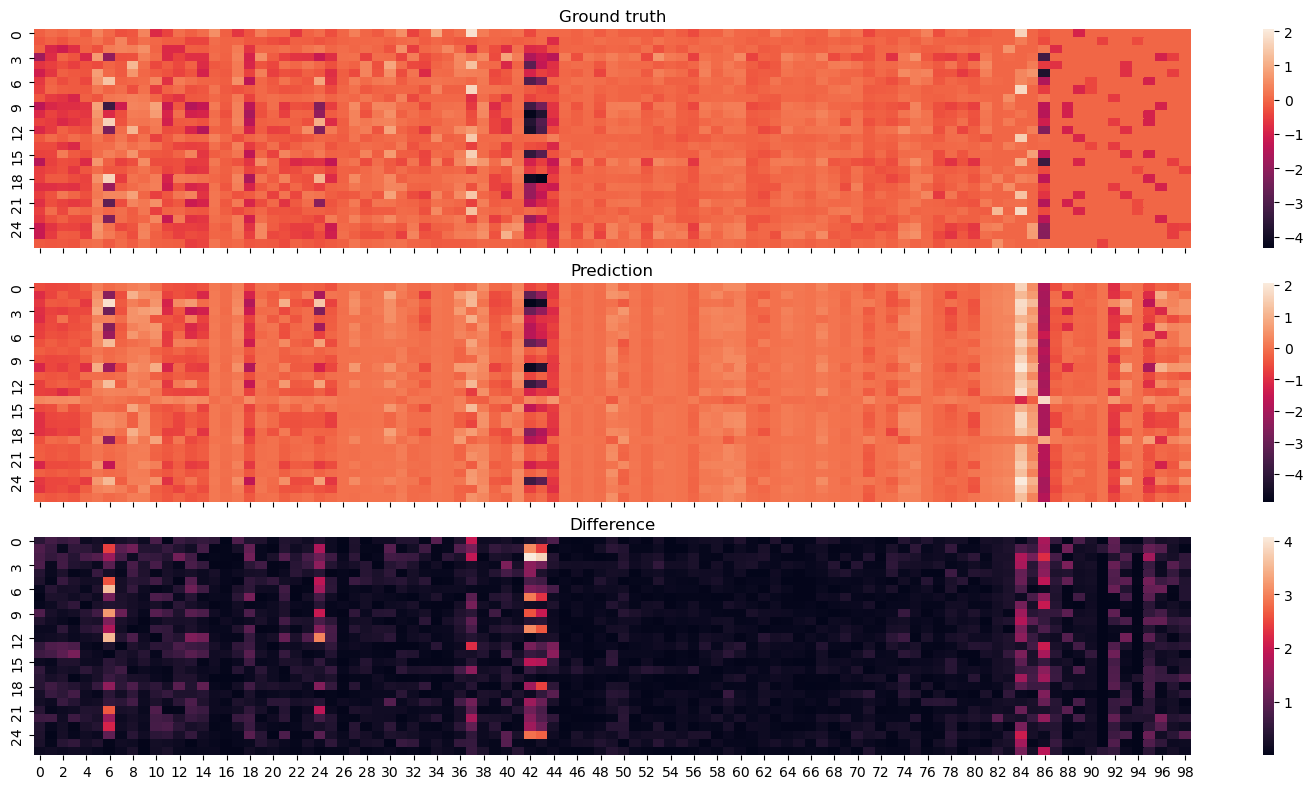

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8), sharex=True)

max_val = max(np.amax(y_true_test), np.amax(y_hat_test))

sns.heatmap(y_true_test, ax=axes[0], vmax=max_val)
axes[0].set_title("Ground truth")
sns.heatmap(y_hat_test, ax=axes[1], vmax=max_val)
axes[1].set_title("Prediction")
sns.heatmap(np.abs(y_hat_test - y_true_test), ax=axes[2])
axes[2].set_title("Difference")
plt.tight_layout()
plt.show()

### Generate multiple json files to run the analysis

In [ ]:
base_json = d

# Three things to change: seed (any value from 0 to 1000), trainset_ratio, validset_ratio

In [ ]:
train